## Trainable distributions

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions

Creating a distribution with a variable mean.

"We want to **learn the mean** of the distribution"

In [4]:
normal = tfd.Normal(loc = tf.Variable(0., name = 'loc'), scale = 1.)

normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [5]:
normal.trainable_variables

2022-02-25 21:51:03.859193: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


(<tf.Variable 'loc:0' shape=() dtype=float32, numpy=0.0>,)

The mean value is "updatable" according to some "learning priciple".

Contrast with:

In [7]:
tfd.Normal(loc = 0, scale = 1.).trainable_variables

()

In Deep Learning we use Maxihum Likelihood. Finding the parameters that maximize the likelihood of our data. 

In practice we minimize the negative log likelihood.

In [11]:
def nll(x_train):
    return -tf.reduce_mean(normal.log_prob(x_train))

With x_train as an array of data points.

In [14]:
x_train = tf.random.uniform((1,10))

x_train

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.32460177, 0.97304165, 0.8518144 , 0.05946314, 0.14946198,
        0.9503871 , 0.34730005, 0.3258779 , 0.46331656, 0.7390926 ]],
      dtype=float32)>

In [15]:
normal.prob(x_train)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.37846878, 0.24849227, 0.27755606, 0.39823762, 0.39451113,
        0.25396562, 0.37559372, 0.37831172, 0.3583412 , 0.30359298]],
      dtype=float32)>

In [13]:
normal.log_prob(x_train)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-0.9345689 , -0.9214542 , -1.342089  , -0.9480151 , -0.93057877,
        -0.9352072 , -0.9217921 , -1.304842  , -0.9375844 , -0.9237805 ]],
      dtype=float32)>

In [16]:
nll(x_train)

<tf.Tensor: shape=(), dtype=float32, numpy=1.1036689>

Training loop for learning the mean parameter from the data.

In [17]:
@tf.function
def get_loss_and_grads(x_train):
    with tf.GradientTape() as tape:
        tape.watch(normal.trainable_variables)
        loss = nll(x_train)
    grads = tape.gradient(loss, normal.trainable_variables)
    return loss, grads

In [18]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.05)

In [34]:
num_steps = 100
means = []
for _ in range(num_steps):
    loss, grads = get_loss_and_grads(x_train)
    optimizer.apply_gradients(zip(grads, normal.trainable_variables))
    means.append(normal.loc.numpy())
    #print(normal.loc.numpy())
    
print(normal.loc.numpy())

0.51842487


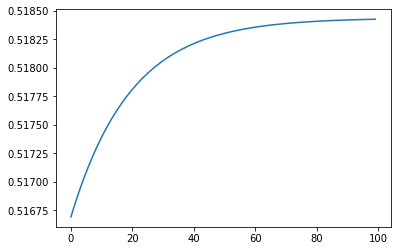

In [35]:
import matplotlib.pyplot as plt

plt.plot(means)

In [36]:
tf.reduce_mean(x_train)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5184357>